In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re

In [2]:
df=pd.read_csv(r"dataSets\Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

### Understanding The Data

**`area_type`**

In [5]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [6]:
df['total_sqft'].dtype

dtype('O')

In [7]:
df['total_sqft'].isnull().sum()

np.int64(0)

No null values in 'total_sqft' column

Since area_type directly related to area of the house/plot. We will plot area with area_type to get the idea how they are differnt. Luckily we have "total_sqft" column which gives the area.

In [8]:
df['total_sqft'].head()

0    1056
1    2600
2    1440
3    1521
4    1200
Name: total_sqft, dtype: object

In [9]:
df['total_sqft'].dtype

dtype('O')

Area must be a numeric datatype, but here it is object type. Also converting it to float gives `ValueError: could not convert string to float: '2100 - 2850'`.
So there must some values with a range. Checking how many of them.


In [11]:
# since ranges contains "-" we will check how many of them are there
df['total_sqft'].str.contains("-", case=False).sum()

np.int64(201)

In [12]:
rng_df = df[['total_sqft','area_type','price']][df['total_sqft'].str.contains("-", case=False)]
print(len(rng_df))
rng_df.sample(5)

201


,total_sqft,area_type,price
8871,750 - 800,Super built-up Area,34.10
6643,2830 - 2882,Super built-up Area,157.50
5374,770 - 841,Super built-up Area,19.33
3862,3293 - 5314,Super built-up Area,226.00
11389,2150 - 2225,Super built-up Area,105.00


for now i will take the average and try to see if it make sense or not

<Axes: xlabel='mid_total_sqft', ylabel='price'>

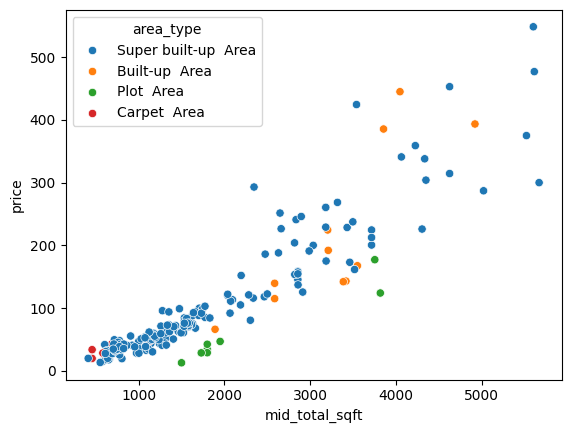

In [13]:
rng_df['mid_total_sqft'] = rng_df['total_sqft'].apply(lambda x: (float(x.split("-")[0]) + float(x.split("-")[1]))/2)

sns.scatterplot(data=rng_df, x='mid_total_sqft', y='price',hue='area_type')

We can see a linear realtionship between price and the total_sqft

<Axes: xlabel='low_total_sqft', ylabel='price'>

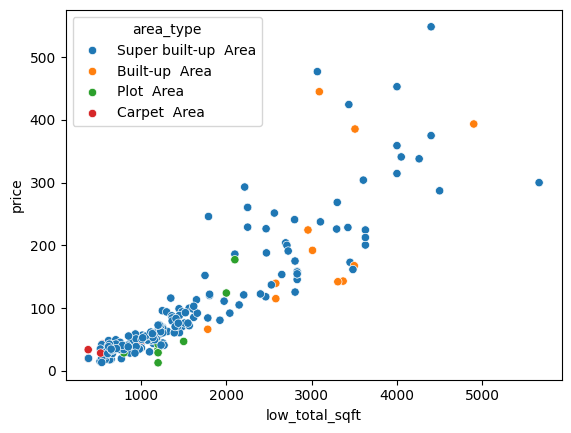

In [14]:
# checking with the lower value of the range
rng_df['low_total_sqft'] = rng_df['total_sqft'].apply(lambda x: float(x.split("-")[0]))

sns.scatterplot(data=rng_df, x='low_total_sqft', y='price',hue='area_type')

<Axes: xlabel='high_total_sqft', ylabel='price'>

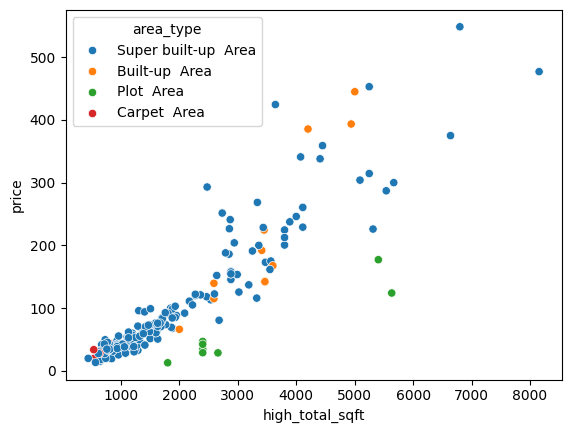

In [15]:
# checking with the higher value of the range
rng_df['high_total_sqft'] = rng_df['total_sqft'].apply(lambda x: float(x.split("-")[1]))

sns.scatterplot(data=rng_df, x='high_total_sqft', y='price',hue='area_type')

I will go with the mid of the range.

In [16]:
pattern = r'[-+]?(?:\d*\.\d+|\d+)(?:[-+]?\d+)?'
temp_df = df['total_sqft'].apply(lambda x: np.mean(np.float32(re.findall(pattern, x))))

In [28]:
def check_for_float(x):
    try:
        float(x)
    except:
        return True
    return False

In [30]:
for i in df['total_sqft']:
    if check_for_float(i):
        print(i)      

2100 - 2850
3010 - 3410
2957 - 3450
3067 - 8156
1042 - 1105
1145 - 1340
1015 - 1540
1520 - 1740
34.46Sq. Meter
1195 - 1440
1200 - 2400
4125Perch
1120 - 1145
4400 - 6640
3090 - 5002
4400 - 6800
1160 - 1195
1000Sq. Meter
4000 - 5249
1115 - 1130
1100Sq. Yards
520 - 645
1000 - 1285
3606 - 5091
650 - 665
633 - 666
5.31Acres
30Acres
1445 - 1455
884 - 1116
850 - 1093
1440 - 1884
716Sq. Meter
547.34 - 827.31
580 - 650
3425 - 3435
1804 - 2273
3630 - 3800
660 - 670
4000 - 5249
1500Sq. Meter
620 - 933
142.61Sq. Meter
2695 - 2940
2000 - 5634
1574Sq. Yards
3450 - 3472
1250 - 1305
670 - 980
1005.03 - 1252.49
3630 - 3800
1004 - 1204
361.33Sq. Yards
645 - 936
2710 - 3360
2249.81 - 4112.19
3436 - 3643
2830 - 2882
596 - 804
1255 - 1863
1300 - 1405
1200 - 2400
1500 - 2400
117Sq. Yards
934 - 1437
980 - 1030
1564 - 1850
1446 - 1506
2249.81 - 4112.19
1070 - 1315
3040Sq. Meter
500Sq. Yards
2806 - 3019
613 - 648
1430 - 1630
704 - 730
1482 - 1846
2805 - 3565
3293 - 5314
1210 - 1477
3369 - 3464
1125 - 1500
167S

In [ ]:
df['total_sqft'].apply(lambda x: True if  )

In [ ]:
asasasas

In [24]:
'2'.isdigit()

True

In [ ]:
'2.34'.is()

False

In [ ]:
isdigit()

In [ ]:
re.findall(pattern, '34.46 -Float.13.53')

['34.46', '.13', '.53']

In [ ]:
temo_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
13320 non-null  float32
dtypes: float32(1)
memory usage: 52.2 KB


In [ ]:
temo_df.isnull().sum()

np.int64(0)

In [ ]:
temo_df

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float32

In [ ]:
import re
[float(m) for m in re.findall(r'[-+]?\d+\.\d+', '34.46 - 13.53')]

[34.46, 13.53]

In [ ]:
np.mean(np.float32(re.findall(r'[-+]?\d+\.\d+', '34.46 -Float.13.53')))

np.float32(23.994999)

In [ ]:
aaaaaaaaaaaaa

NameError: name 'aaaaaaaaaaaaa' is not defined

In [ ]:
df['total_sqft'].astype(float)

In [ ]:

df['total_sqft'].str.contains("-", case=False).sum()

In [ ]:
[df['total_sqft']==].astype(float,errors='coerce').unique()

In [ ]:
df['total_sqft'].astype(float,errors='ignore')==

In [ ]:
df.shape

In [ ]:
asasasasa

In [ ]:
([ x for x in df['total_sqft'].astype(str) if "-" in x])

In [ ]:
df["-" in df['total_sqft']]

?????? what the data tells

**availability**

In [ ]:
df['availability'].str.lower().value_counts()